# HW 1
### EE 399 Machine Learning for Science and Engineering

Completed by: Ewan Lister on 04/03/2023


Set up your own GitHub account (private) and share your Git with me and the TAs (Trung Le and Nithin Joseph): kutz@uw.edu, tle45@uw.edu, nphilipj@uw.edu

Status: Done, GitHub can be accessed via this [link](https://github.com/ewan-lister/EE-399).


## Problem 1

Consider the data from lecture on 3/31:

     X=np.arange(0,31)
     Y=np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41,
     40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])

Fit data to a least squares metric, and this model: $ f(x) = A\cos{Bx} + Cx + D$ 

(i) Write a code to find the minimum error and determine the parameters A,B,C,D.




In [4]:
# import useful math and plotting libraries
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

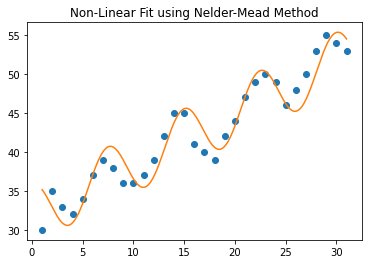

In [5]:
# define data
X = np.arange(0,31)
Y = np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41,
     40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])

# number of inputs
num_in = len(Y)

# proposed fit for data
# accepts input value as well as models parameters (floats)
def model_1(x, c):
    y = c[0] * np.cos(c[1] * x) + (c[2] * x) + c[3]
    return y

# define the objective function for optimization
def error(c, x, y, num_in):
    e2 = np.sqrt((np.sum(model_1(x, c) - y) ** 2) / num_in)
    return e2

# set the initial guess for the parameters
c0 = np.array([4, np.pi/3.5, 0.6, 29])

# perform optimization
res = opt.minimize(error, c0, args=(np.arange(1,num_in + 1), Y, num_in), method='Nelder-Mead')

# get the optimized parameters
c = res.x

# generate the data for plotting
tt = np.arange(1, num_in + 0.01, 0.01)
yfit = (c[0]*np.cos(c[1]*tt)+(c[2] * tt) + c[3])

# plot the raw data and the fitted curve
plt.plot(np.arange(1, num_in + 1), Y, 'o', label='data')
plt.plot(tt, yfit, label='fit')
plt.title('Non-Linear Fit using Nelder-Mead Method')
plt.show()


(ii) With the results of (i), fix two of the parameters and sweep through values of the other two parameters to generate a 2D loss (error) landscape. Do all combinations of two fixed parameters and two swept parameters. You can use something like pcolor to visualize the results in a grid. How many minima can you find as you sweep through parameters?

**Ans:** Upon complteting (ii), I discovered numerous minima. Ultimately, the number of minima depend in part on the landscape in which the fixed minima localize the swept minima. However, as an example

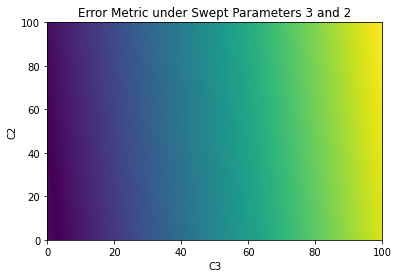

In [6]:
# condense previous operations into a single function fit_data_f1 for usage in proceeding
# exercizes
def fit_data_f1(num_in, c0, Y):
    # perform optimization
    res = opt.minimize(error, c0, args=(np.arange(1,num_in + 1), Y, num_in), method='Nelder-Mead')
    # get the optimized parameters
    c = res.x
    # generate the data for plotting
    tt = np.arange(1, num_in + 0.01, 0.01)
    yfit = (c[0]*np.cos(c[1]*tt)+(c[2] * tt) + c[3])
    # plot the raw data and the fitted curve
    plt.plot(np.arange(1, num_in + 1), Y, 'ko')
    plt.plot(tt, yfit, 'r-')
    plt.show()

# manipulate c0 once more
c0 = np.array([5, np.pi/5, 1, 83])

plot_dim = 100
plot_granularity = 1 # 10 gradations per integer
par = [3, 2]
# we should create an array whose indeces contain the error of the model for a given row and column
# corresponding to c0[n] and c0[m]

# accepts a 2d array of floats
# plots array as a color map
def plot_color(e1_array, par):
    label = 'Error Metric under Swept Parameters ' + str(par[0]) + ' and ' + str(par[1])
    plt.pcolormesh(e1_array)
    plt.title(label)
    plt.xlabel('C' + str(par[0]))
    plt.ylabel('C' + str(par[1]))
    plt.show()


# accepts: model parameters c0 (list of floats)
# list of idex of parameters to be swept (list of int)
# inputs and outputs of data (lists of floats)
# additionally accepts array_dim and array_granularity
# for determining dimensions of returned array and fineness
# of array
# returns: an array containing the error of a model
# as a function of swept parameters
def sweep_parameters(c0, par, inputs, outputs, plot_dim, plot_granularity):
    dim = plot_dim * plot_granularity
    # first set up function which creates an array
    error_array = np.zeros((dim, dim))

    num_in = len(inputs)
    # iterates through zero array and initializes with swept value of error
    # function, where chosen parameters par[0] and par[1] are x and y respectively
    with np.nditer(error_array, flags=['multi_index'], op_flags=['writeonly']) as it:
        for space in it:
            [x, y] = it.multi_index
            c0[par[0]] = x / plot_granularity
            c0[par[1]] = y / plot_granularity
            space[...] = error(c0, inputs, outputs, num_in)
    return error_array

# calculate error_array
error_array = sweep_parameters(c0, par, X, Y, plot_dim, plot_granularity)

# plot color map of error array
plot_color(error_array, par)


(iii) Using the first 20 data points as training data, fit a line, parabola and 19th degree
polynomial to the data. Compute the least-square error for each of these over the training
points. Then compute the least square error of these models on the test data which are
the remaining 10 data points.

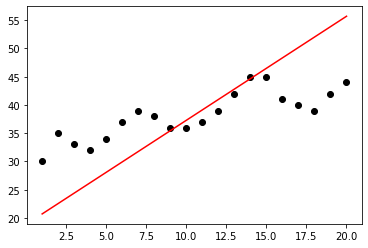

Error for linear fit on 20 points: 8.23423506986376
Error for linear fit on disjoint 10 points: 72.5660048907239


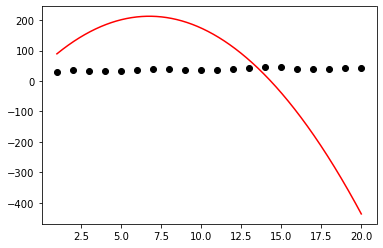

Error for parabola fit on 20 points: 107.0952915078141
Error for linear fit on dijoint 10 points: 358.07894030579945


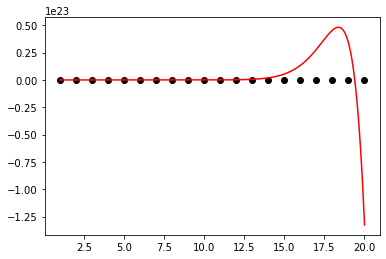

Error for 19 degree polynomial fit on 20 points: 2.891772137624641e+22
Error for linear fit on disjoint 10 points: 4.9550272555971866e+17


In [26]:
# initialize new data
X_0 = X[:20]
X_comp = np.arange(0, 10)
Y_0 = Y[0:20]
Y_comp = Y[20:30]

# define functions which can be adjusted to calculate least-square error
# for multiple models.

# models for line, and nth degree polynomial (also applicable for parabola)
def line(x, c):
     y = c[0] * x + c[1]
     return y

# need to revise to apply to array of x's instead of single value
def n_poly(x, c, degree):
     length = len(x)
     y = np.zeros(length)
     terms = len(c)
     powers = np.arange(degree, -1, -1, dtype=int)
     for index in range(length):
          inputs = np.ones(terms) * x[index]
          y[index] = single_poly(c, powers, inputs)
     return y 

def single_poly(c, powers, inputs):
     var = np.power(inputs, powers)
     expr = np.multiply(var, c)
     y = np.sum(expr)
     return y


# multiplexer for choosing different f_theta(x) models
def model_sel(model, x, c):
     parabola_deg = 2
     n_deg = 19
     if model == 0:
          output = model_1(x, c)
     elif model == 1: 
          output = line(x, c)
     elif model == 2:
          output = n_poly(x, c, parabola_deg)
     elif model == 3:
          output = n_poly(x, c, n_deg)
     else:
          print("Unknown model number. Please try again.")
     return output

# calculates least-squares error of model versus data
# models: 0 - model_1, 1 - line, 2 - parabola, 3 - 19 degree polynomial
def error_modular(c, x, y, model):
     input_size = len(x)
     e2 = np.sqrt((np.sum(model_sel(model, x, c) - y) ** 2) / input_size)
     return e2

def fit_data(c0, Y, model):
     num_in = len(Y)
     # perform optimization
     res = opt.minimize(error_modular, c0, args=(np.arange(1,num_in + 1), Y, model), method='Nelder-Mead')
     # get the optimized parameters
     c = res.x
     # generate the data for plotting
     tt = np.arange(1, num_in + 0.01, 0.01)
     yfit = model_sel(model, tt, c)
     # plot the raw data and the fitted curve
     plt.plot(np.arange(1, num_in + 1), Y, 'ko')
     plt.plot(tt, yfit, 'r-')
     plt.show()
     return c

# generates size array of random constants taken from normal distribution
def seed(size):
     return np.random.rand(1, size) * 50


# generate random starting parameters
line_c = seed(2)
par_c = seed(3)
poly_c = seed(20)

# print line fit and error
line_fit = fit_data(line_c, Y_0, 1)
line_error_1 = error_modular(line_fit, X_0, Y_0, 1)
line_error_2 = error_modular(line_fit, X_comp, Y_comp, 1)
print('Error for linear fit on 20 points: ' + str(line_error_1))
print('Error for linear fit on disjoint 10 points: ' + str(line_error_2))

# print parabola fit and error
par_fit = fit_data(par_c, Y_0, 2)
par_error_1 = error_modular(par_fit, X_0, Y_0, 2)
par_error_2 = error_modular(par_fit, X_comp, Y_comp, 2)
print('Error for parabola fit on 20 points: ' + str(par_error_1))
print('Error for linear fit on dijoint 10 points: ' + str(par_error_2))

# print 19 degreee polynomial fit and error
poly_fit = fit_data(poly_c, Y_0, 3)
poly_error_1 = error_modular(poly_fit, X_0, Y_0, 3)
poly_error_2 = error_modular(poly_fit, X_comp, Y_comp, 3)
print('Error for 19 degree polynomial fit on 20 points: ' + str(poly_error_1))
print('Error for linear fit on disjoint 10 points: ' + str(poly_error_2))




(iv) Repeat (iii) but use the first 10 and last 10 data points as training data. Then fit the model to the test data (which are the 10 held out middle data points). Compare these results to (iii)

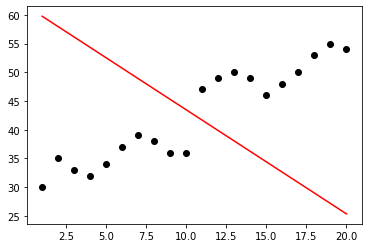

Error for linear fit on 20 points: 32.38269031123316
Error for linear fit on disjoint 10 points: 19.261400602943237


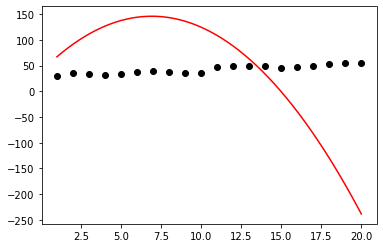

Error for parabola fit on 20 points: 1201.1286389480297
Error for linear fit on dijoint 10 points: 135.45674557040223


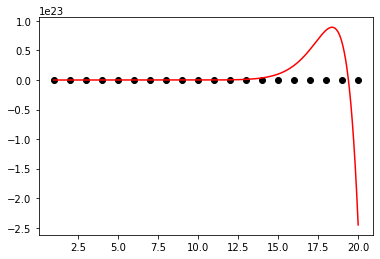

Error for 19 degree polynomial fit on 20 points: 1.2731683620620426e+27
Error for linear fit on disjoint 10 points: 7.559143988321937e+22


In [30]:
# initialize new data
X_1 = np.concatenate([X[:10], X[-10:]])
X_comp_1 = X[10:20]
Y_1 = np.concatenate([Y[0:10], Y[20:30]])
Y_comp_1 = Y[10:20]

# generate random starting parameters
line_c = seed(2)
par_c = seed(3)
poly_c = seed(20)

# print line fit and error
line_fit = fit_data(line_c, Y_1, 1)
line_error_1 = error_modular(line_fit, X_1, Y_1, 1)
line_error_2 = error_modular(line_fit, X_comp_1, Y_comp_1, 1)
print('Error for linear fit on 20 points: ' + str(line_error_1))
print('Error for linear fit on disjoint 10 points: ' + str(line_error_2))

# print parabola fit and error
par_fit = fit_data(par_c, Y_1, 2)
par_error_1 = error_modular(par_fit, X_1, Y_1, 2)
par_error_2 = error_modular(par_fit, X_comp_1, Y_comp_1, 2)
print('Error for parabola fit on 20 points: ' + str(par_error_1))
print('Error for linear fit on dijoint 10 points: ' + str(par_error_2))

# print 19 degreee polynomial fit and error
poly_fit = fit_data(poly_c, Y_1, 3)
poly_error_1 = error_modular(poly_fit, X_1, Y_1, 3)
poly_error_2 = error_modular(poly_fit, X_comp_1, Y_comp_1, 3)
print('Error for 19 degree polynomial fit on 20 points: ' + str(poly_error_1))
print('Error for linear fit on disjoint 10 points: ' + str(poly_error_2))